# Tensile test workflow

Here, an examplary workflow of a tensile test is presented.
- The data source is obtained from a triple store via sparql queries.
- Then the elastic modulus is calculcated based on the given stress-strain data.
- The calculated elastic modulus is returned to the triple store.
- **Authors and Contributors :** Muhmmad Hassani, Jannis Grundmann, Ahmed Aslam, Jörg Schaarschmidt, Tilmann Hickel

### Importing and defining project from the custom defined module 

In [1]:
from pyiron_tensile_test import Project

In [2]:
pr = Project('test_tensile_job')
pr.remove_jobs(silently=True)

  0%|          | 0/1 [00:00<?, ?it/s]

### Creating a job of type tensile test

In [3]:
job = pr.create.job.TensileJob(job_name='tensile_job')

### Defining the sparql endpoint and query for data source

In [4]:
job.endpoint = 'http://localhost:8000/api/jena/S355/sparql'

In [5]:
download_url = job.query_data_source(test_name='Zx1')
download_url

'http://microservice_dbdocker:27777/api/S355_SteelSheet/S355_n2c.ipynb/804a2653db074a088c97832f'

In [6]:
download_url = download_url.replace("microservice_dbdocker", "127.0.0.1")

### Obtaining the experimental dataset

In [7]:
job.get_dataset(url=download_url)

In [8]:
job.experimental_json

,Data Resource,Object,Tensile Test,dataseries
has data resource location,http://microservice_dbdocker:27777/api/S355_SteelSheet/S355_n2c.ipynb/804a2653db074a088c97832f,NaN,NaN,NaN
hasIdentifier,dataresource_canon,obj,NaN,NaN
supplied object identifier,NaN,Zx1,NaN,NaN
Material,NaN,NaN,S355,NaN
executed by,NaN,NaN,"[J. , M. (S., J.)]",NaN
has data resource,NaN,NaN,"[{'Data Resource': {'has data resource location': 'http://microservice_dbdocker:27777/api/S355_SteelSheet/S355_r2n.ipynb/0c7e18fcc77d44b68043bb6d', 'hasIdentifier': 'dataresource_native'}}, {'Data...",NaN
has generated object identifier,NaN,NaN,Zx1,NaN
has measured maximum force,NaN,NaN,"{'unit': 'Kilonewton', 'value': 62.006923703333335}",NaN
has measured modulus of elasticity,NaN,NaN,"{'unit': 'Gigapascal', 'value': 194}",NaN
has measured original diameter,NaN,NaN,"{'unit': 'Millimetre', 'value': 5.992}",NaN


### Extracting stress and strain data from the dataset

In [9]:
job.extract_stress_strain()

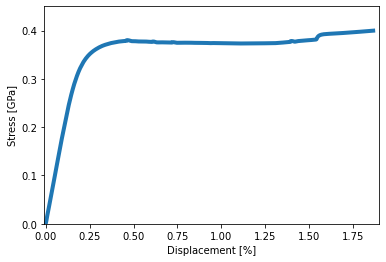

In [10]:
job.plot_stress_strain()

## Calculating the elastic modulus

In [11]:
job.run()

The job tensile_job was saved and received the ID: 5


In [12]:
job.output.elastic_modulus

181.58485412597656

### Return the calculated value to the triple store

In [13]:
job.update_triple_store(test_name='Zx1')

In [14]:
results = job.verify_update()

## Verifying the hdf5 file storage

In [15]:
job_load = pr.load(job.name)

In [16]:
job_load.output

DataContainer({'elastic_modulus': 181.58485412597656})

In [17]:
job_load.input['test_name']

'Zx1'